# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


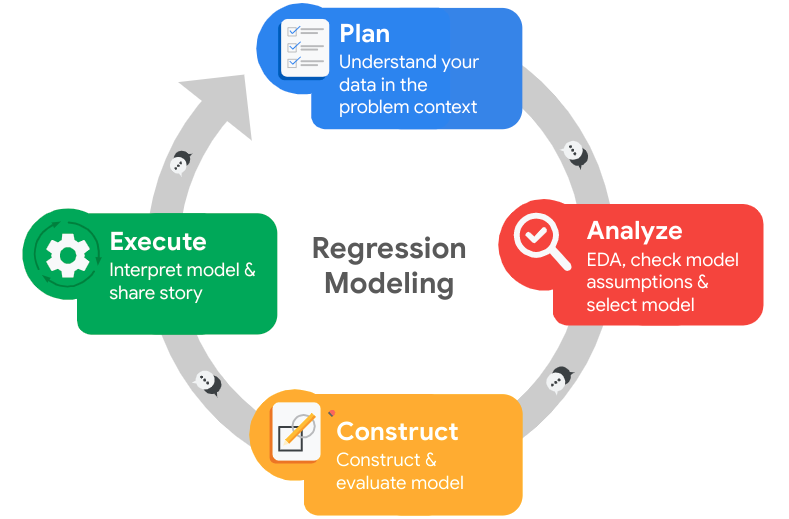

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [78]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [79]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [80]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [81]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [82]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [83]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'average_montly_hours':'average_monthly_hours',
                            'Work_accident': 'accident',
                            'Department':'department',
                            'time_spend_company': 'tenure'
    
})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [84]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
accident                 0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [85]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [86]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [87]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

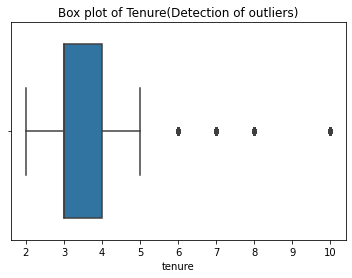

In [88]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x = df['tenure'])
plt.xlabel('tenure')
plt.title('Box plot of Tenure(Detection of outliers)')
plt.show()


In [89]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
tenure_q1 = df['tenure'].quantile(0.25)
tenure_q3 = df['tenure'].quantile(0.75)
IQR = tenure_q3 - tenure_q1

tenure_upper = tenure_q3 + 1.5 * IQR
tenure_lower = tenure_q1 - 1.5 * IQR

print('upper limit:', tenure_upper)
print('lower limit:', tenure_lower)

outliers = df[(df['tenure']> tenure_upper) | (df['tenure'] < tenure_lower)]
print("There are ", len(outliers), "outliers in the tenure variable.")

upper limit: 5.5
lower limit: 1.5
There are  824 outliers in the tenure variable.


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [90]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print()
print(df['left'].value_counts(normalize = True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

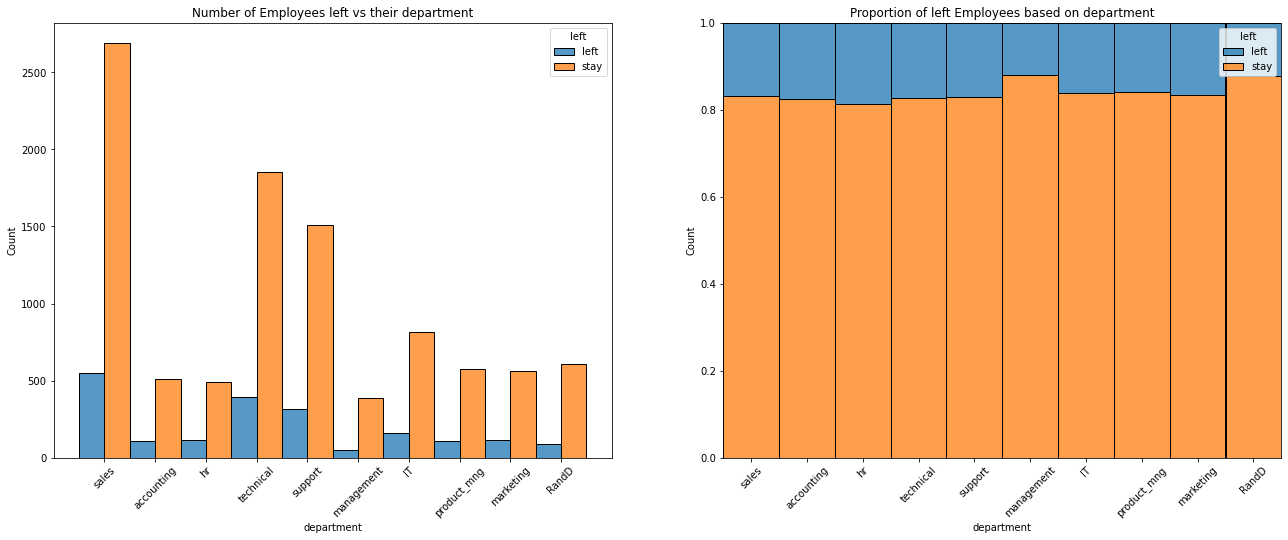

In [91]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize = [22,8])
sns.histplot(x = df['department'], hue = df['left'].map({0:'stay',1:'left'}),multiple = 'dodge',ax = ax[0])
ax[0].set_title('Number of Employees left vs their department')
ax[0].tick_params(axis='x', rotation=45)
sns.histplot(x = df['department'], hue = df['left'].map({0:'stay',1:'left'}),multiple = 'fill',ax = ax[1])
ax[1].set_title('Proportion of left Employees based on department')
ax[1].tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'Evalation Score vs average monthly working hours')

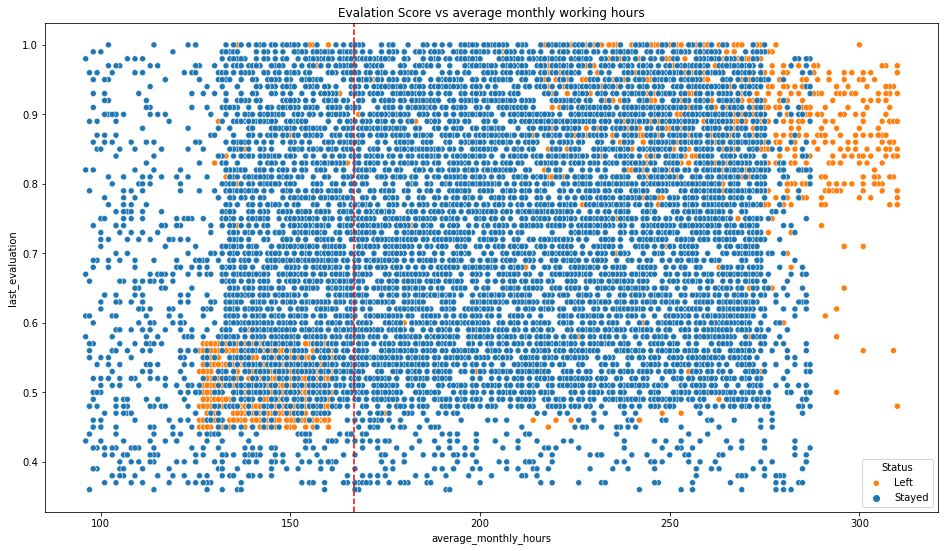

In [92]:
# Create a plot as needed
### YOUR CODE HERE ###

#Assume full time employees work 38 hours a week
monthly_working_standard = 38*52/12
# monthly_working_standard =164.67

plt.figure(figsize =(16,9))
ax = sns.scatterplot(x = 'average_monthly_hours', y = 'last_evaluation',hue = df['left'], data = df)
ax.legend(title='Status', labels=['Left', 'Stayed'])
ax.axvline(x = 166.67, color = 'red',linestyle = '--')
ax.set_title('Evalation Score vs average monthly working hours')

Text(0.5, 1.0, 'Satisfaction Level vs average monthly working hours')

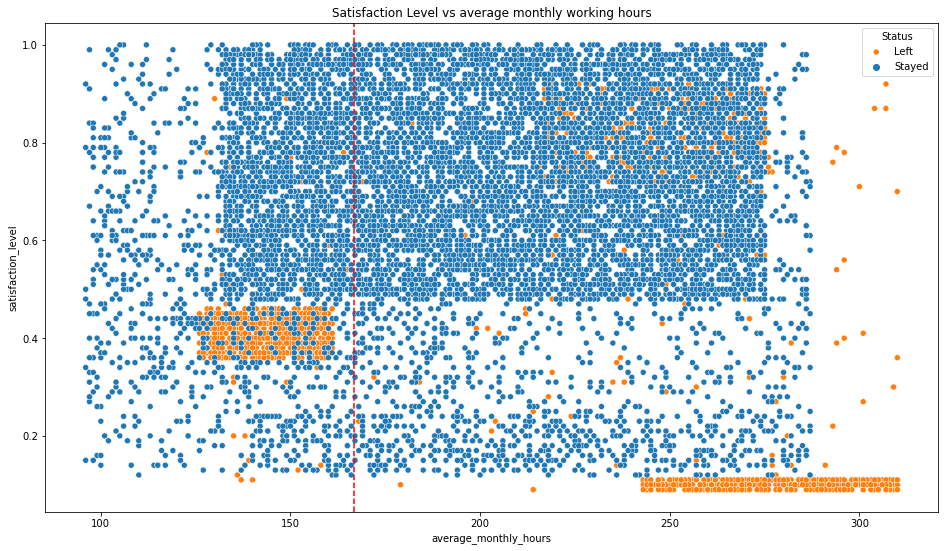

In [93]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize =(16,9))
ax = sns.scatterplot(x = 'average_monthly_hours', y = 'satisfaction_level',hue = df['left'], data = df)
ax.legend(title='Status', labels=['Left', 'Stayed'])
ax.axvline(x = 166.67, color = 'red',linestyle = '--')
ax.set_title('Satisfaction Level vs average monthly working hours')


Text(0.5, 1.0, 'Satisfaction Level vs last evaluation score')

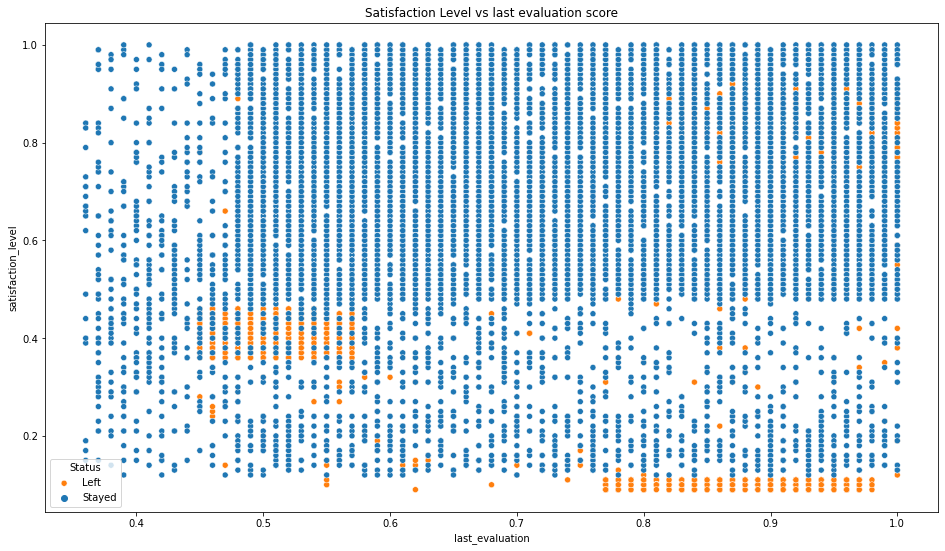

In [94]:
plt.figure(figsize =(16,9))
ax = sns.scatterplot(x = 'last_evaluation', y = 'satisfaction_level',hue = df['left'], data = df)
ax.legend(title='Status', labels=['Left', 'Stayed'])

ax.set_title('Satisfaction Level vs last evaluation score')

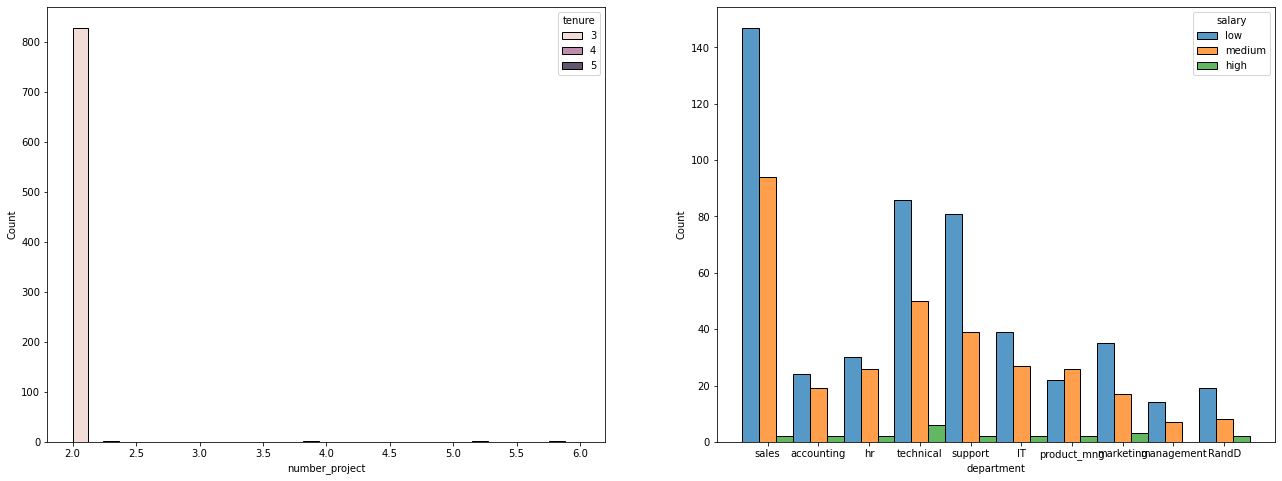

In [95]:
# Create a plot as needed
### YOUR CODE HERE ###
#It's easier to intepret people who work longer would have higher evaluation score and lower satisfaction level;
#But we can see a orange square in both of the scatterplots, discover further.

df_suspecious = df[((df['left'] == 1) 
                    & (df['satisfaction_level']>0.3) 
                    & (df['satisfaction_level']<0.5) 
                    &(df['average_monthly_hours'] < 166.67)
                    & (df['last_evaluation'] > 0.4)

                    & (df['last_evaluation'] < 0.6))]
fig,ax = plt.subplots(1,2,figsize = [22,8])
sns.histplot(x = 'number_project',hue = 'tenure',multiple = 'dodge', data = df_suspecious,ax = ax[0])

sns.histplot(x = 'department',hue = 'salary',multiple = 'dodge', data = df_suspecious,ax = ax[1])


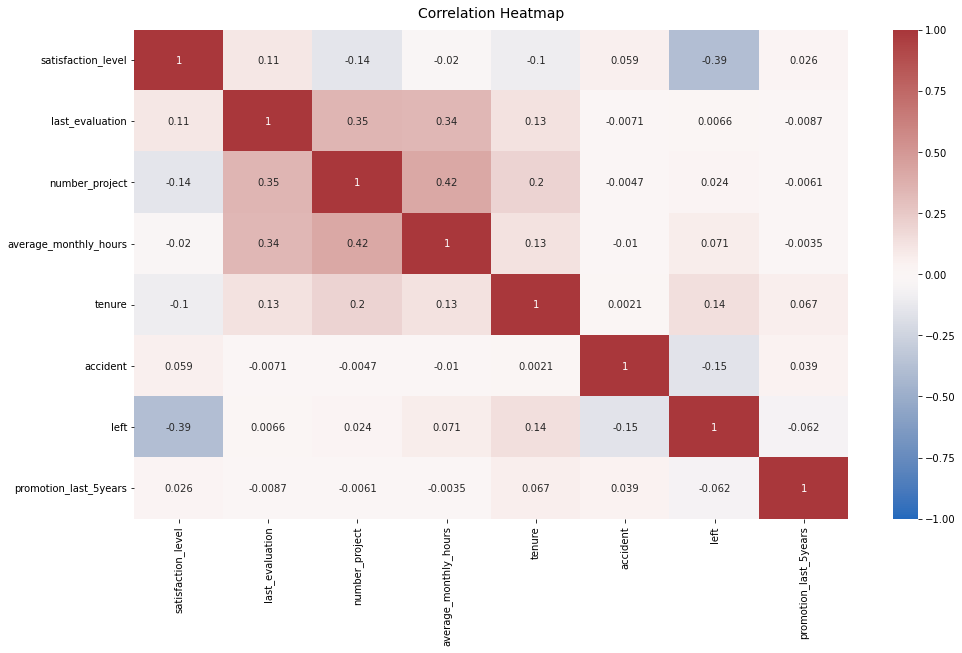

In [96]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (16,9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [100]:
### YOUR CODE HERE ###
#Preprocess the variables
df_processed = df.copy()
df_processed['salary'] = df_processed['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes
df_processed = pd.get_dummies(df_processed, drop_first = True)
df_processed

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,1,0,0,0,0


In [101]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc' : 'mean_test_roc_auc',
                    'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc':[auc]
                          },
                         )

    return table


In [102]:
#Since the outcome is binary, we will use logist regression as regression model

#Exclude the outliers
df_ready = df_processed[(df_processed['tenure'] <= tenure_upper) & (df_processed['tenure']>= tenure_lower)]

y = df_ready['left']
x = df_ready.drop('left',axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,stratify = y, random_state= 42)
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(x_train,y_train)

y_pred = log_clf.predict(x_test)



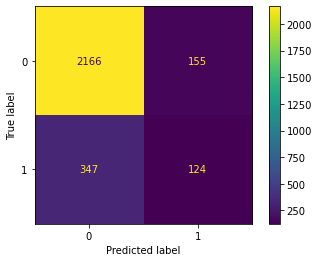

,precision,recall,f1-score,support
class 0,0.861918,0.933218,0.896152,2321.000000
class 1,0.444444,0.263270,0.330667,471.000000
accuracy,0.820201,0.820201,0.820201,0.820201
macro avg,0.653181,0.598244,0.613409,2792.000000
weighted avg,0.791492,0.820201,0.800757,2792.000000


In [103]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)
log_disp.plot(values_format = '')
plt.show()

report = classification_report(
    y_test, y_pred, target_names=['class 0','class 1'], output_dict=True
)
pd.DataFrame(report).T



In [104]:
#Tree Based model

x = df_ready.drop('left',axis = 1)
y = df_ready['left']
x_train,x_test, y_tain,y_test = train_test_split(x,y,stratify = y, test_size = 0.25, random_state = 42)
tree = DecisionTreeClassifier(random_state = 42)
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]
            }
scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}
tree_cv = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')
tree_cv.fit(x_train,y_train)


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [105]:
print(tree_cv.best_params_)
print(tree_cv.best_score_)

tree_cv_metrics = make_results('Decision Tree', tree_cv, 'auc')
tree_cv_metrics

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9738070859906354


,model,precision,recall,F1,accuracy,auc
0,Decision Tree,0.959115,0.912839,0.935275,0.978747,0.973807


In [106]:
#Random Forest
rf = RandomForestClassifier(random_state = 42)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_cv = GridSearchCV(rf, cv_params, cv =4, scoring = scoring, refit = 'roc_auc')
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [107]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)
rf_cv_metrics = make_results("Random Forest", rf_cv, 'auc')
print(tree_cv_metrics)
print(rf_cv_metrics)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
0.9808603403667706
           model  precision    recall        F1  accuracy       auc
0  Decision Tree   0.959115  0.912839  0.935275  0.978747  0.973807
           model  precision    recall        F1  accuracy      auc
0  Random Forest   0.967404  0.906463  0.935829  0.979105  0.98086


In [108]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [109]:
rf_cv_test_scores = get_scores('Random Forest', rf_cv, x_test,y_test)
rf_cv_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest,0.979866,0.929936,0.954248,0.984957,0.963029


In [ ]:
%%time
#XGBoosting
xgb = XGBClassifier(
    random_state=42
)

cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

scoring = {'accuracy','precision','recall','f1','roc_auc'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring,cv = 4, refit = 'roc_auc')
xgb_cv.fit(x_train,y_train)

In [ ]:
print(xgb_cv.best_score_)
print(sgb_cv.best_params_)
xgb_cv_metrics = get_results('XGBoosting',xgb_cv,'auc')

print(tree_cv_metrics)
print(rf_cv_metrics)
print(xgb_cv_metrics)
xgb_cv_test_scores = get_scores('XGBoosting',xgb_cv,x_test, y_test)

In [127]:
#Feature Engineering
#Reason: If an employee decides to leave, then they will work less than the average level, so there might be a data leakage problem
df2 = df_processed.drop('satisfaction_level',axis = 1)
df2['overworked'] = df2['average_monthly_hours']

print('Max Hours:', df2['average_monthly_hours'].max())
print("Min Hours:", df2['average_monthly_hours'].min())

#average working hours = 

df2.loc[df2['average_monthly_hours'] > 166.67, 'overworked'] = 1
df2.loc[df2['average_monthly_hours'] <= 166.67, 'overworked'] = 0
df2.head()
df2 = df2.drop('average_monthly_hours',axis = 1)

Max Hours: 310
Min Hours: 96


In [128]:
y2 = df2['left']
x2 = df2.drop('left',axis = 1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, stratify = y2, test_size = 0.25, random_state = 42)

In [129]:
#Decision Tree V2
tree = DecisionTreeClassifier(random_state = 42)
cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]
            }
scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}
tree_cv_v2 = GridSearchCV(tree, cv_params, scoring = scoring, cv =4 ,refit = 'roc_auc')
tree_cv_v2.fit(x2_train, y2_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [130]:
print(tree_cv_v2.best_params_)
print(tree_cv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.9738070859906354


In [131]:
tree_cv_v2_metrics = make_results('Decision Tree v2', tree_cv_v2, 'auc')

print(tree_cv_metrics) #AUC 0.9738
print(tree_cv_v2_metrics) #AUC 0.9668



           model  precision    recall        F1  accuracy       auc
0  Decision Tree   0.959115  0.912839  0.935275  0.978747  0.973807
              model  precision    recall       F1  accuracy       auc
0  Decision Tree v2    0.82892  0.896191  0.86064  0.951628  0.955538


In [132]:
#Random Forest v2
rf = RandomForestClassifier(random_state = 42)
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf_cv_v2 = GridSearchCV(rf, cv_params, cv =4, scoring = scoring, refit = 'roc_auc')
rf_cv_v2.fit(x2_train,y2_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [133]:
print(rf_cv_v2.best_score_)
print(rf_cv_v2.best_params_)
rf_cv_v2_metrics = make_results('Random Forest_v2', rf_cv_v2, 'auc')
rf_cv_v2_metrics

0.967294171648674
{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


,model,precision,recall,F1,accuracy,auc
0,Random Forest_v2,0.850143,0.882772,0.865979,0.954742,0.967294


In [134]:
print(tree_cv_metrics)
print(tree_cv_v2_metrics)
print(rf_cv_metrics)
print(rf_cv_v2_metrics)
#Although the models without features engineering perform better, we still need to consider the data ethnics problem.
#Hence we check on their test set performance

           model  precision    recall        F1  accuracy       auc
0  Decision Tree   0.959115  0.912839  0.935275  0.978747  0.973807
              model  precision    recall       F1  accuracy       auc
0  Decision Tree v2    0.82892  0.896191  0.86064  0.951628  0.955538
           model  precision    recall        F1  accuracy      auc
0  Random Forest   0.967404  0.906463  0.935829  0.979105  0.98086
              model  precision    recall        F1  accuracy       auc
0  Random Forest_v2   0.850143  0.882772  0.865979  0.954742  0.967294


In [139]:
tree_cv_v2_test = get_scores('Decision Tree v2 test', tree_cv_v2, x2_test, y2_test)
print(tree_cv_v2_test)

rf_cv_v2_test = get_scores('Random Forest v2 test', rf_cv_v2, x2_test, y2_test)
print(rf_cv_v2_test)

#Both models perform good in the test set, but the Random Forest model has a 0.5% higher AUC, 
#so we might choose random forest as our model for this project.

                   model  precision    recall        f1  accuracy       AUC
0  Decision Tree v2 test   0.800347  0.925703  0.858473    0.9493  0.939851
                   model  precision    recall        f1  accuracy       AUC
0  Random Forest v2 test    0.87524  0.915663  0.894995   0.96431  0.944831


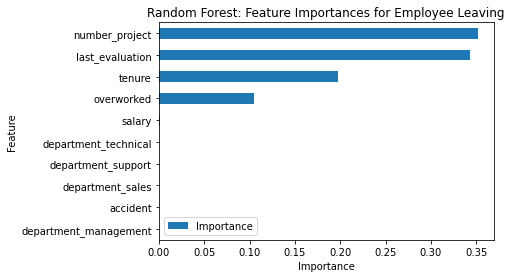

In [138]:
#Feature importance for random forest before feature engineering
feat_impt = rf_cv_v2.best_estimator_.feature_importances_
ind = np.argpartition(rf_cv_v2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x2.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

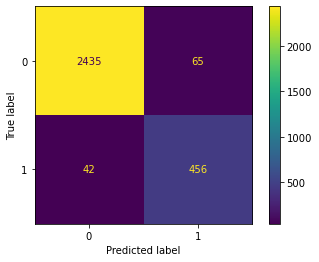

In [141]:
#Confusion Matrix
y_pred_v2 = rf_cv_v2.predict(x2_test)
cm = confusion_matrix(y2_test, y_pred_v2, labels = rf_cv_v2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv_v2.classes_)
disp.plot(values_format = '')
#Model did pretty well in predicting employees' left/stay behaviours with 
#65 False Positive(Predict leave but actually stay)
#42 False Negative(Predict stay but leave)
#Overall model has a storng predicting power.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Key Insights from model
The Random Forest v2 model performed best among all models and it's selected as our final model.
Feature importance shows that average monthly hours, number of projects, promotion history, and evaluation scores are the most influential predictors. Employees who are overworked (long hours, many projects) or underappreciated (no recent promotions despite high evaluations) are at higher risk of leaving.

2. Business recommendations
Monitor workload balance: 
Avoid consistent overwork by tracking monthly hours and project assignments.

Enhance promotion transparency: 
Employees with long tenure but no promotion history are more likely to leave — regular career reviews could reduce this.

Recognize high performers: 
Offer targeted incentives or flexible schedules to high-performing employees with heavy workloads.

Use the model as a retention alert tool: 
HR can proactively identify at-risk employees and intervene early.

3. Recommendations to company
Integrate the Random Forest model into HR analytics dashboards to automatically flag high-risk employees each quarter. Combine this with qualitative feedback from managers to prioritize interventions.

4. Model improvement
Incorporating additional variables such as salary, engagement survey results, or training participation.

Testing advanced models like XGBoost for better generalization. (Due to the computing power and online notebook, it's not feasible for me to run a XGBoost for now)

Investigate for employee who belongs to the 'df_suspecious' set, is there any other similarities they have?

5. Additional questions
Are there specific projects that lead to a large number of employees left the company?

How does workload fluctuation over time affect turnover probability?

Could satisfaction level trends (not just final values) improve prediction accuracy?

6. Resources
Scikit-learn documentation (RandomForestClassifier, GridSearchCV, metrics)

Pandas and Seaborn for data handling and visualization

Coursera’s Google Advanced Data Analytics Capstone reference materials for model validation guidance

7. Ethical Considerations
Fairness: Ensure model features (e.g., salary, promotion) do not indirectly encode gender, age, or department bias.

Transparency: The model should support HR decisions, not replace human judgment.

Employees flagged as “at-risk” should be offered support, not penalized.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.